## Introduction to CNN and CV


In [ ]:
# Get the data
import zipfile

#download to local folder
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-20 12:18:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.142.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   123MB/s    in 0.9s    

2021-06-20 12:18:56 (123 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list the files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# another way to inspect directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualize Images programatically

In [ ]:
# Get classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]   # remove .DS_store file
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup target dir
  target_folder = target_dir + target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # shape of image

  return img


['2312987.jpg']
Image shape: (512, 512, 3)


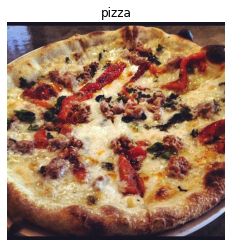

In [ ]:
# view random image fro training data
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
# images imported are giant arrays in tensor format
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[30, 20, 29],
        [28, 21, 29],
        [28, 21, 29],
        ...,
        [16, 24, 35],
        [17, 26, 35],
        [17, 26, 35]],

       [[24, 22, 35],
        [24, 22, 35],
        [24, 22, 35],
        ...,
        [22, 25, 32],
        [22, 25, 30],
        [22, 25, 30]],

       [[16, 22, 38],
        [16, 22, 38],
        [16, 22, 38],
        ...,
        [22, 20, 23],
        [21, 19, 22],
        [20, 20, 22]],

       ...,

       [[25, 22, 33],
        [25, 22, 33],
        [25, 22, 33],
        ...,
        [23, 22, 36],
        [23, 22, 36],
        [23, 22, 36]],

       [[23, 20, 31],
        [23, 20, 31],
        [23, 20, 31],
        ...,
        [22, 21, 35],
        [22, 21, 35],
        [22, 21, 35]],

       [[24, 21, 32],
        [24, 21, 32],
        [24, 21, 32],
        ...,
        [23, 22, 36],
        [23, 22, 36],
        [23, 22, 36]]], dtype=uint8)>

In [ ]:
# view image shape
img.shape  # returns width, height, color channels


(512, 512, 3)

## End to End Sample
- Load images
- Preprocess images
- Build CNN model
- Compile CNN
- Fit CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# preprocess
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# build CNN model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   activation="relu",
                                   input_shape=(224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))


# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
history_1 = model_1.fit(train_data, 
                        epochs=5, steps_per_epoch=len(train_data), 
                        validation_data=valid_data, validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 196ms/step - loss: 0.6164 - accuracy: 0.6380 - val_loss: 0.4680 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4627 - accuracy: 0.7853 - val_loss: 0.3742 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4158 - accuracy: 0.8207 - val_loss: 0.3428 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3473 - accuracy: 0.8460 - val_loss: 0.2990 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3257 - accuracy: 0.8600 - val_loss: 0.3579 - val_accuracy: 0.8440


## Note
If runtime of cell takes more than 10 seconds per epoch use GPU in Runtime -> Change Runtime Type -> Hardware Accelator - > GPU
Might need to run previous cells as it will restart 

In [ ]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Try building model based on earlier section (classification)

# set seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
history_2 = model_2.fit(train_data, 
                        epochs=5, steps_per_epoch=len(train_data), 
                        validation_data=valid_data, validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 8s 173ms/step - loss: 1.2366 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Above model has low performance, despite with 20 times more parameters than the CNN model
# try improving 

# set seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
history_3 = model_3.fit(train_data, 
                        epochs=5, steps_per_epoch=len(train_data), 
                        validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 2.7978 - accuracy: 0.6280 - val_loss: 0.4815 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6585 - accuracy: 0.7147 - val_loss: 0.5941 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6363 - accuracy: 0.7280 - val_loss: 0.5696 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5697 - accuracy: 0.7567 - val_loss: 0.4221 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5339 - accuracy: 0.7787 - val_loss: 0.5659 - val_accuracy: 0.7760


In [ ]:
# model_3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## CNN Binary Classification : Break down
- Visualize
- Preprocess
- Create Model
- Fit Model
- Evaluate Model
- Adjust different parameters to improve model
- Repeat until satisfied

# 1. Visualize

['1333055.jpg']
Image shape: (384, 512, 3)
['1593835.jpg']
Image shape: (384, 512, 3)


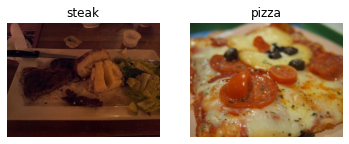

In [ ]:
# visualize

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


# 2. Preprocess images


In [ ]:
# directory path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# create train test data generator and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# load image and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get sample from train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# get first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. Create CNN Model


In [ ]:
# import libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# create model
model_4 = Sequential()
model_4.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)))
model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(1, activation="sigmoid"))



In [ ]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check len of train and test data
len(train_data), len(test_data)

(47, 16)

In [ ]:
# fit model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 1.5610 - accuracy: 0.6433 - val_loss: 0.4816 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4632 - accuracy: 0.7973 - val_loss: 0.4079 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3566 - accuracy: 0.8533 - val_loss: 0.3904 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.2191 - accuracy: 0.9227 - val_loss: 0.3525 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0858 - accuracy: 0.9807 - val_loss: 0.3782 - val_accuracy: 0.8380


# Evaluate Model

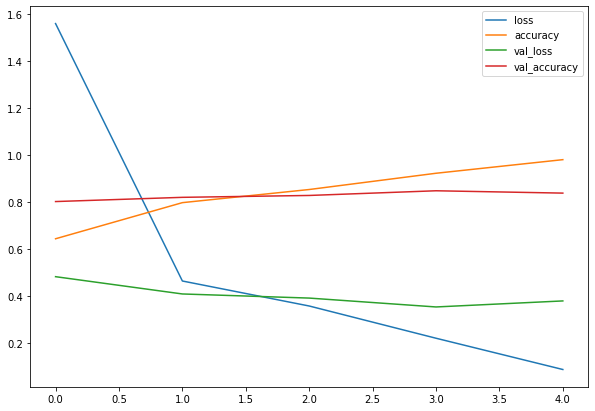

In [ ]:
# Plot training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))


In [ ]:
# Plot Train and Validation (test) curves separate
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation metrics:
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))    # how many epochs we did run for?

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


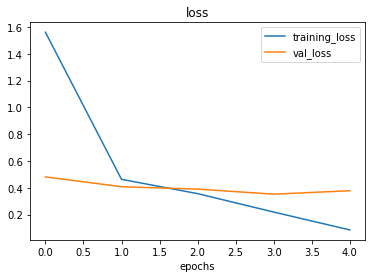

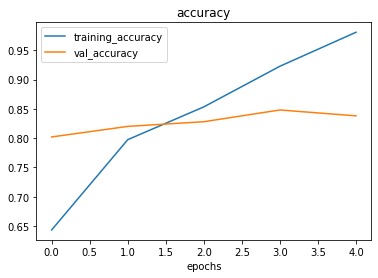

In [ ]:
# Check loss and accuracy od model_4
plot_loss_curve(history_4)

## Note :
Ideally two loss curves (training and validation) will be very similar to each other decreasing at similar rates, when there are large differences model may be overfitting

# 6. Adjust the Model Parameters
Fitting ML model comes in 3 steps
- Create Baseline
- Beat Baseline by overfitting a larger model
- Reduce Baseline

Ways to induce Overfitting
* Incease number of conv layers
* Icrease number of conv filters
* Add another Dense layer to the output of our flattened layer

Reduce Overfitting (also called Regularization)
* Add data augmentation
* Add regularization (such as MaxPool2D)



In [ ]:
# create model
model_5 = Sequential()
model_5.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10, 3, activation="relu"))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10, 3, activation="relu"))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(1, activation="sigmoid"))


In [ ]:
# compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6032 - accuracy: 0.6653 - val_loss: 0.4548 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4826 - accuracy: 0.7787 - val_loss: 0.5484 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4647 - accuracy: 0.7913 - val_loss: 0.3698 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4355 - accuracy: 0.8060 - val_loss: 0.4237 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4069 - accuracy: 0.8287 - val_loss: 0.3528 - val_accuracy: 0.8540


In [ ]:
# model_5 summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

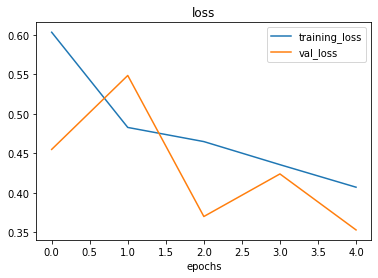

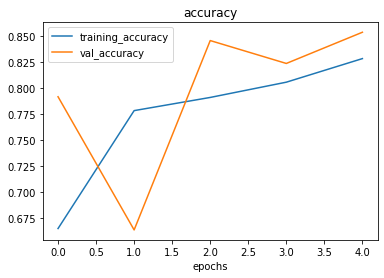

In [ ]:
# plot the loss curves
plot_loss_curve(history_5)

## Finding Data Augumentation

In [ ]:
# create ImageDataGenerator training instance with data Augumentation
train_datagen_augumented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip=True)

# create ImageDataGenerator trining instance wihtout data Augumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator test instance without data Augumentation
test_datagen = ImageDataGenerator(rescale=1/255.)



### Data Augumentaion
It is the process of altering training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Alterting means adjusting the rotation of image, flipping it, cropping it or something similar 

In [ ]:
# Import data and Augument it from training directory
print("Augumented Training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     batch_size=32,
                                                                     class_mode="binary",
                                                                     shuffle=False)

# non-augumented train data batches
print("Non-Augumented Training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# non-augumented test data batches
print("Non-Augumented Test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


Augumented Training data
Found 1500 images belonging to 2 classes.
Non-Augumented Training data
Found 1500 images belonging to 2 classes.
Non-Augumented Test data
Found 500 images belonging to 2 classes.


 ** Note : **
Data augumentation is usually only performed on training data. Using ImageDataGenerator built-in data augumentation parameters our images are left as they are in directories but are modified as when they are loaded into model 

In [ ]:
# Visualize
# get some sample augumented data batches
images, labels = train_data.next()
augumented_images, augumented_labels = train_data_augumented.next()


showing image number : 10


(-0.5, 223.5, 223.5, -0.5)

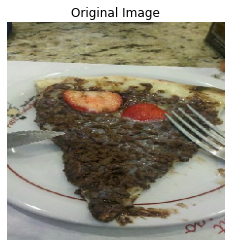

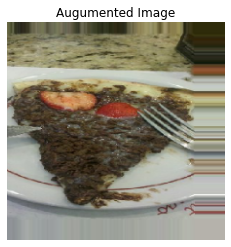

In [ ]:
# show original and augumented image
import random
random_number = random.randint(0, 32)
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title("Augumented Image")
plt.axis(False)


In [ ]:
# Model on Augumented Training Data

In [ ]:
# create model
model_6 = Sequential()
model_6.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10, 3, activation="relu"))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10, 3, activation="relu"))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1, activation="sigmoid"))


In [ ]:
# compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# fit model
history_6 = model_6.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6998 - accuracy: 0.4827 - val_loss: 0.6785 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6936 - accuracy: 0.5313 - val_loss: 0.6540 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6887 - accuracy: 0.5293 - val_loss: 0.6522 - val_accuracy: 0.5540
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.7550 - accuracy: 0.6060 - val_loss: 0.6438 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6736 - accuracy: 0.6007 - val_loss: 0.6210 - val_accuracy: 0.6160


In [ ]:
# model summary
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

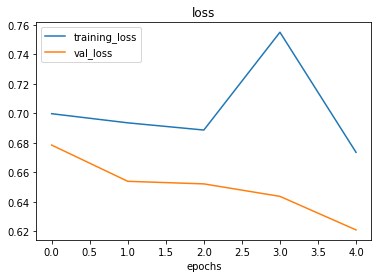

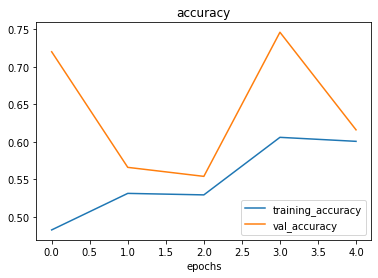

In [ ]:
# plot loss curve
plot_loss_curve(history_6)

### Note : 
We get poor predictions could be due to too many parametes set at Augumenttaion.
Also we didn't shuffle earlier, lets try shuffling the images and do augumentation

In [ ]:
# Augument shuffled train data batches
print("Augument Shuffled Training data")
train_data_augumented_shuffled = train_datagen_augumented.flow_from_directory(train_dir,
                                                                              target_size=(224, 224),
                                                                              batch_size=32,
                                                                              class_mode="binary",
                                                                              shuffle=True)


Augument Shuffled Training data
Found 1500 images belonging to 2 classes.


In [ ]:
# create model
model_7 = Sequential()
model_7.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Conv2D(10, 3, activation="relu"))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10, 3, activation="relu"))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1, activation="sigmoid"))


In [ ]:
# compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# fit model
history_7 = model_7.fit(train_data_augumented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6531 - accuracy: 0.6047 - val_loss: 0.5518 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 20s 417ms/step - loss: 0.5649 - accuracy: 0.7133 - val_loss: 0.5166 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 20s 421ms/step - loss: 0.5095 - accuracy: 0.7440 - val_loss: 0.4187 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 20s 418ms/step - loss: 0.5265 - accuracy: 0.7467 - val_loss: 0.3714 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 20s 417ms/step - loss: 0.4803 - accuracy: 0.7560 - val_loss: 0.3328 - val_accuracy: 0.8740


In [ ]:
# model summary
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

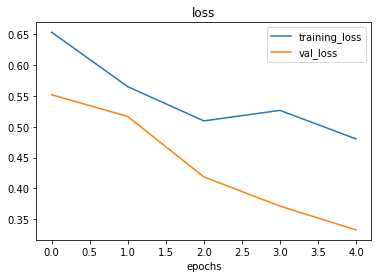

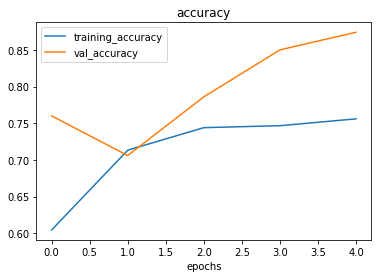

In [ ]:
# plot loss curves
plot_loss_curve(history_7)

### Note :
When shuffling training data, model gets exposed to all different kind of images 

## 7. Repeat until satisfied
Since we have beaten our baseline we could try couple more to improve the model
- Increase number of layers (Eg. Add mode Conv2D and MaxPool layers)
- Increaes number of filters in each Conv2D layers (Eg. from 10 to 32, 64 etc)
- Train for longer
- Find ideal learning rate
- Get more data
- use Transfer Learning to leverage what another model has learn and adjust it for our model



## Making Prediction with our trained model on custom data


In [ ]:
# Class Names
print(class_names)

['pizza' 'steak']


In [ ]:
# View example image
import matplotlib.image as mpimg

!wget https://image.shutterstock.com/image-photo/dining-wooden-table-food-top-600w-1538087027.jpg


--2021-06-20 13:38:45--  https://image.shutterstock.com/image-photo/dining-wooden-table-food-top-600w-1538087027.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 99.86.37.44, 99.86.37.49, 99.86.37.85, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|99.86.37.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93936 (92K) [image/jpeg]
Saving to: ‘dining-wooden-table-food-top-600w-1538087027.jpg’

dining-wooden-table 100%[===================>]  91.73K   488KB/s    in 0.2s    

2021-06-20 13:38:46 (488 KB/s) - ‘dining-wooden-table-food-top-600w-1538087027.jpg’ saved [93936/93936]



(-0.5, 599.5, 419.5, -0.5)

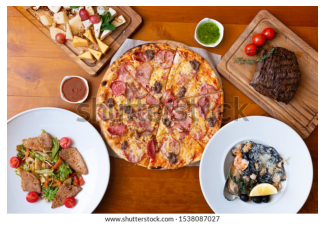

In [ ]:
pizza_1 = mpimg.imread("dining-wooden-table-food-top-600w-1538087027.jpg")
plt.imshow(pizza_1)
plt.axis(False)

In [ ]:
pizza_1.shape

(420, 600, 3)

### Note :
While making prediction with custom data/image, it's important that custom image is pre-processed in same format as the data model was trained on

In [ ]:
# create function to import image and resize 
def load_and_prep_image(filename, img_shape=224):
  """
  Reads image from filename and turns it into tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  # read image
  img = tf.io.read_file(filename)

  # decode file into tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale the image (get all values between 0 and 1)
  img = img/255.

  return img


In [ ]:
pizza_1 = load_and_prep_image("dining-wooden-table-food-top-600w-1538087027.jpg", img_shape=224)
pizza_1.shape

TensorShape([224, 224, 3])

In [ ]:
pizza_1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8372067 , 0.5114408 , 0.25316876],
        [0.83266366, 0.5031119 , 0.24631916],
        [0.84238446, 0.5090511 , 0.24906337],
        ...,
        [0.5303352 , 0.17347248, 0.        ],
        [0.5266324 , 0.1697697 , 0.        ],
        [0.5212141 , 0.16435139, 0.        ]],

       [[0.8499168 , 0.5205051 , 0.27284226],
        [0.84429276, 0.51488096, 0.26390055],
        [0.8413034 , 0.50797004, 0.25200891],
        ...,
        [0.52916664, 0.17230392, 0.00122549],
        [0.53004634, 0.1731836 , 0.        ],
        [0.5252933 , 0.1684305 , 0.        ]],

       [[0.84753585, 0.52864146, 0.28532475],
        [0.83854604, 0.5091343 , 0.26193538],
        [0.8593969 , 0.5260635 , 0.27116162],
        ...,
        [0.53039217, 0.17352942, 0.        ],
        [0.5256695 , 0.16880679, 0.        ],
        [0.51639974, 0.15953697, 0.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.  

In [ ]:
pred = model_7.predict(tf.expand_dims(pizza_1, axis=0))
pred

array([[0.17105342]], dtype=float32)

Custom image when put through our model, it currently outputs prediction probability. We could vizualize the image as well as model prediction

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# get index of predicted class by rounding prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
# make pred and plot function for multiclass images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located in filename, makes prediction with model and plots the image with predicted class as title
  """

  # import the target image and preprocess
  img = load_and_prep_image(filename)

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add logic for multi-class & get pred_class name
  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)



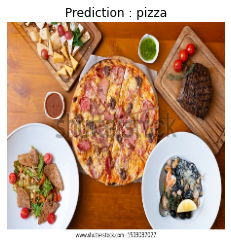

In [ ]:
# test model on custom image
pred_and_plot(model_7, "dining-wooden-table-food-top-600w-1538087027.jpg")

In [ ]:
!wget https://image.shutterstock.com/image-photo/pizza-beef-mushrooms-600w-164499875.jpg


--2021-06-20 14:37:16--  https://image.shutterstock.com/image-photo/pizza-beef-mushrooms-600w-164499875.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 99.86.37.49, 99.86.37.14, 99.86.37.44, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|99.86.37.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79825 (78K) [image/jpeg]
Saving to: ‘pizza-beef-mushrooms-600w-164499875.jpg’

pizza-beef-mushroom 100%[===================>]  77.95K  --.-KB/s    in 0.1s    

2021-06-20 14:37:17 (648 KB/s) - ‘pizza-beef-mushrooms-600w-164499875.jpg’ saved [79825/79825]



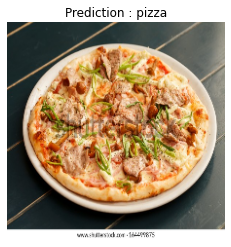

In [ ]:
pred_and_plot(model_7, "pizza-beef-mushrooms-600w-164499875.jpg")

In [ ]:
!wget https://image.shutterstock.com/image-photo/juicy-medium-beef-rib-eye-260nw-732177829.jpg

--2021-06-20 14:38:25--  https://image.shutterstock.com/image-photo/juicy-medium-beef-rib-eye-260nw-732177829.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 99.86.37.49, 99.86.37.44, 99.86.37.14, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|99.86.37.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36160 (35K) [image/jpeg]
Saving to: ‘juicy-medium-beef-rib-eye-260nw-732177829.jpg’

juicy-medium-beef-r 100%[===================>]  35.31K  --.-KB/s    in 0.07s   

2021-06-20 14:38:26 (497 KB/s) - ‘juicy-medium-beef-rib-eye-260nw-732177829.jpg’ saved [36160/36160]



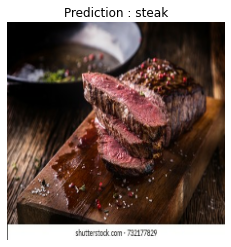

In [ ]:
pred_and_plot(model_7, "juicy-medium-beef-rib-eye-260nw-732177829.jpg")